In [24]:
print("hello world")

hello world


# introduce tensorflow

In [1]:
import tensorflow as tf
import numpy as np

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# melakukan definisi
model = tf.keras.models.Sequential([
    # input layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # output layer
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer = tf.optimizers.Adam(),
                              loss = 'sparse_categorical_crossentropy',
                              metrics = ['accuracy'])
# maltih model dengan iterasi 10
model.fit(x_train, y_train, epochs = 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7952 - loss: 0.5808
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8683 - loss: 0.3625
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8826 - loss: 0.3181
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8865 - loss: 0.3022
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8952 - loss: 0.2789
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9008 - loss: 0.2661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9070 - loss: 0.2480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9114 - loss: 0.2359
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9124 - loss: 0.2312
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9178 - loss: 0.2175


# Pra-pemrosesan Data untuk Model

In [2]:
print(tf.__version__)

2.18.0


### data augmentasi kalau tensorflow versi < 2.9

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255)

### data augmentasi kalau tensorflow versi > 2.9

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 100

resize_andre_scale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

In [13]:
# melakukan berbagai cungsi augmentasi

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [15]:
# tahap terakhir memasukan data augmentasi pada layer sequentials

model = tf.keras.Sequential([
#menambahkan processing image yang telah didefinisikan sebelumnya
resize_andre_scale,
data_augmentation,

layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),


])

### pemrosesan data bahasa

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ["i love my cat"]

tokenizer = Tokenizer(num_words = 300)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

print(tokenizer.word_index)
print(sequences)



{'i': 1, 'love': 2, 'my': 3, 'cat': 4}
[[1, 2, 3, 4]]


### menggunakan model untuk melakukan prediksi


In [20]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [23]:
X = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
Y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0], dtype=float)

print(X)
print(Y)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [24]:
# memilih model NN 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 - Parameter units dari fungsi keras.layers.Dense() adalah jumlah perceptron yang dimiliki oleh layer tersebut. Yang perlu diperhatikan pada model sequential adalah layer pertama dari model tersebut haruslah memiliki parameter input_shape agar model bisa mengenali bentuk input yang akan diprosesnya.
 - Parameter input_shape menunjukkan bentuk dari setiap elemen input yang akan diterima oleh model. Pada kasus yang kita alami, setiap elemen dari data adalah sebuah bilangan numerik 1 digit sehingga input_shape dapat diisi dengan angka 1. Jika sebuah elemen dari dataset kita berupa gambar yang memiliki dimensi 32*32 piksel, input_shape yang sesuai adalah [32,32].
 

In [27]:
# impelementasi optimizer dan loss function 

model.compile(optimizer='sgd', loss='mean_squared_error')

# pemanggilan fit untuk menyuruh model mempelajari hubungan antara atribut dan label
model.fit(X,Y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 87.2350
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 81.2057
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 76.2467
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 72.0548
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 68.4205
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 65.1985
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 62.2877
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 59.6175
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 57.1385
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 54.8155
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 52.6236
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 50.5445
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 48.5649
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 46.6748
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 44.8665
Epo

In [28]:
# memprediksi model 
model.predict(np.array([4,5]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[12.999623],
       [13.999658]], dtype=float32)

In [30]:
# memprediksi model 
model.predict(np.array([4,5])).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[13.],
       [14.]], dtype=float32)

### model sekuensial dengan beberapa layer

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, input_shape=[1]),
    tf.keras.layers.Dense(units=15),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1),
])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Membuat Model untuk Klasifikasi Dua Kelas

In [36]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/MrasyidN/dataset/refs/heads/main/Oranges%20vs.%20Grapefruit/citrus.csv')
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [38]:
df.name.value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

In [44]:
# karena NN tidak bisa memproses kategori jadi mubah ke numerik

# df.name[df.name == 'grapefruit'] = 0
# df.name[df.name == 'orange'] = 1

In [45]:
# bisa juga menggunakan label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
print(df)

      name  diameter  weight  red  green  blue
0        1      2.96   86.76  172     85     2
1        1      3.91   88.05  166     78     3
2        1      4.42   95.17  156     81     2
3        1      4.47   95.60  163     81     4
4        1      4.48   95.76  161     72     9
...    ...       ...     ...  ...    ...   ...
9995     0     15.35  253.89  149     77    20
9996     0     15.41  254.67  148     68     7
9997     0     15.59  256.50  168     82    20
9998     0     15.92  260.14  142     72    11
9999     0     16.45  261.51  152     74     2

[10000 rows x 6 columns]


In [46]:
dataset = df.values

In [47]:
X = dataset[:,1:6]

In [48]:
y = dataset[:,0]

In [52]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)
x_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

In [54]:
# melakukan pemisahan pada data training dan testgin
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, test_size=0.3)

In [66]:
from keras.models import Sequential
from keras.layers import Dense

# 3 layer dan menggunakan function relu

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')

])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5163 - loss: 0.7006
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.6578
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.6155
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9144 - loss: 0.5506
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9145 - loss: 0.4602
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.3627
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9254 - loss: 0.2876
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9192 - loss: 0.2505
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - loss: 0.2229
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9238 - loss: 0.2092
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9289 - loss: 0.1971
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

### membuat dan melatih model klasifikasi banyak kelas

In [67]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [74]:
df_citrus = pd.read_csv('https://raw.githubusercontent.com/MrasyidN/dataset/refs/heads/main/Iris.csv')
df_citrus.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
# membuang kolom yang tidak terpakai
df_citrus = df_citrus.drop(columns='Id')

In [76]:
# melakukan one hot encoding dengan get_dummies()

category = pd.get_dummies(df_citrus.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [78]:
# melakuakn penggabungan koilom hasil encoding pada yang sudah ada sebeluymnya
new_df = pd.concat([df_citrus, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [79]:
# melakuakn konversi df ke bilangan numpy array

dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [80]:
# melakukan pemisahan antara variabel independen dan dependen 

# variabel independen
X = dataset[:,0:4]

# variabel dependen
y = dataset[:,4:7]

In [83]:
# melakukan normalisasi 
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [88]:
# membagi data train dan test
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, test_size=0.3)

# model dengan 3 layer
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(62, activation='relu'),
    Dense(3, activation='softmax')
])

# menentukan optimizer dan loss function 
model.compile(optimizer='Adam',
              # tugas categorical crossentropy untuk evaluasi seberapa baik  model
              # untuk memprediksi distribusi probabilitas kelas yang benar
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# melakuakn penampuangan kedalam objek hist(history )
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3989 - loss: 1.0521  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5224 - loss: 1.0160
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6406 - loss: 0.9973 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6385 - loss: 0.9663 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6677 - loss: 0.9384 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6667 - loss: 0.9073 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6927 - loss: 0.8648 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.8413 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6740 - loss: 0.8234 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6698 - loss: 0.8006 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6344 - loss: 0.7779 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6729 - loss: 0.7276 


In [89]:
# evaluasi model 
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9280 - loss: 0.1032  


[0.07511703670024872, 0.9555555582046509]

### plot loss dan akurtasi trained model (visualisasi plot)

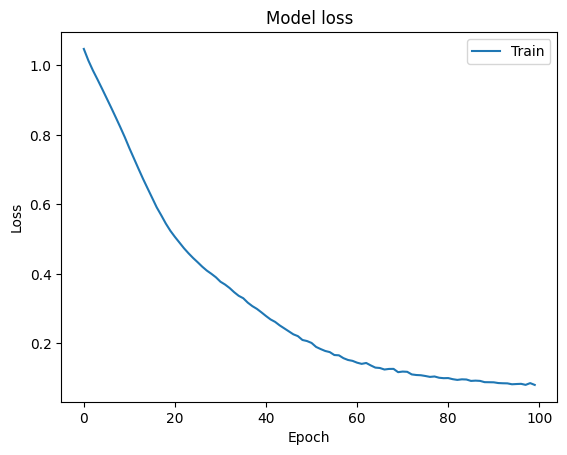

In [90]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

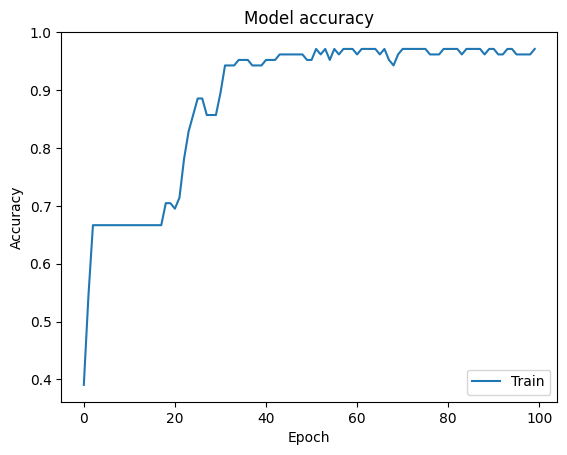

In [91]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

### Mencegah Overfitting dengan Dropout dan Batch Normalization

#### Dropout

In [95]:
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### batch normalization 

In [96]:
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0,5),
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')
])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Optimasi Pelatihan Menggunakan Callbacks

In [97]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species, dtype=int)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0,5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100


c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4318 - loss: 1.1550
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6944 - loss: 0.7413
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8637 - loss: 0.5206
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8838 - loss: 0.4208
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8796 - loss: 0.3614
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8349 - loss: 0.3441
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8512 - loss: 0.3090
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9025 - loss: 0.2893
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9317 - loss: 0.2596
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9279 - loss: 0.2552
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9723 - loss: 0.2053
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9844 - loss: 0.1657
E

In [103]:
# membuat clas callback

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\n akurasi sudah mencapai 90%")
            self.model.stop_training = True
callbacks=myCallback()

# menambah parameter
hist = model.fit(X_train, Y_train, epochs=100, callbacks = [callbacks])


Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0770
 akurasi sudah mencapai 90%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9851 - loss: 0.0927


### Menggunakan Dataset dari TensorFlow

In [105]:
# import library
import tensorflow as tf

# menampung dataset
mnist = tf.keras.datasets.mnist

# melakukan pembagian dataset
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


5


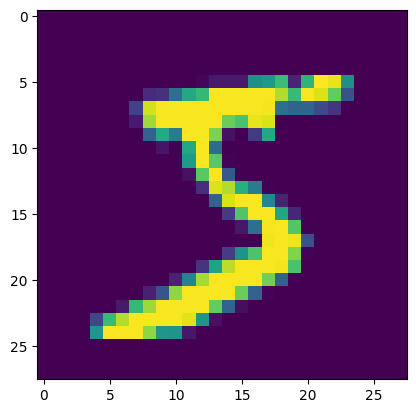

In [107]:
# menampillkan label

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [111]:
# melakukan normalisasi data
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

# menggunakna 3 layer untuk mengubah input matriks 2d menjadi 1d
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# menentukan optimizer
model.compile(optimizer=tf._optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(gambar_latih, label_latih, epochs=5)

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1117 - loss: 2.3016
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1111 - loss: 2.3013
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1112 - loss: 2.3000
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1105 - loss: 2.2967
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1292 - loss: 2.2890


### Membuat Model Menggunakan TensorFlow Datasets

In [113]:
pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyarrow-19.0.1-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
    --------------------------------------- 0.1/5.3 MB 2.6 MB/s eta 0:00:02
   - -------------------------------------- 0.2/5.3 MB 2.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.3/5.3 MB 2.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/5.3 MB 2.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/5.3 MB 2.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.6/5.3 MB 2.2 MB/s eta 0:00:03
   ----- ---------------------------------- 0.7/5.3 MB 2.3 MB/s eta 0:00:03
   ------ --------------------------------- 0.8/5.3 MB 2.2 MB/s eta 0:00:03
   ------ --------------------------------- 0.9/5.3 MB 2.2 MB/s eta 0:00:02
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [115]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [116]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.03 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.10s/ url]
                                                                        

Dataset mnist downloaded and prepared to C:\Users\rasyid\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


- Fungsi load() memungkinkan Anda untuk menggunakan dataset yang telah disediakan oleh TensorFlow Datasets. 
- Parameter pertama ('mnist') menunjukkan nama dataset yang ingin dimuat. 
- Parameter kedua ('split='train'') menunjukkan bahwa kita hanya memuat bagian pelatihan dari dataset MNIST. 
- Parameter ketiga ('shuffle_files=True') mengindikasikan bahwa file-file dataset akan diacak sebelum dimuat, sehingga urutan data tidak akan tetap sama setiap kali dataset dimuat ulang. 

In [117]:
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('mnist',
              split = ['train', 'test'],
              batch_size=-1,
              as_supervised=True))

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
# menggukana 3 argumen untk melakukan compile model yang dibangun
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [121]:
model.fit(train_images, train_labels, batch_size=50, epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8446 - loss: 0.8861
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9762 - loss: 0.0835
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9816 - loss: 0.0638
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9858 - loss: 0.0531
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9870 - loss: 0.0477


In [122]:
# melakuakn evaluasi 
model.evaluate(test_images, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.9876 - loss: 0.0675


[0.06861475110054016, 0.9861999750137329]

### Penggunaan Batch Loading

In [123]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\rasyid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [124]:
model.fit(training_images, training_labels, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8789 - loss: 0.4270
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9642 - loss: 0.1220
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9760 - loss: 0.0798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0564
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9881 - loss: 0.0410


In [125]:
model.fit(training_images, training_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9928 - loss: 0.0262
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9955 - loss: 0.0190
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9965 - loss: 0.0170
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9976 - loss: 0.0144
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9970 - loss: 0.0141
